# Data preparation

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import Cdf
import Pmf


# define global plot parameters
params = {'axes.labelsize' : 12, 'axes.titlesize' : 12,
          'font.size' : 12, 'legend.fontsize' : 10,
          'xtick.labelsize' : 12, 'ytick.labelsize' : 12}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

# connect to database and get data
conn = sqlite3.connect('data/youtube-traceroute.db')

# read necessary tables from database
date_cols = ['dtime']
devices = pd.read_sql_query('select distinct(unit_id) from traceroute', conn)
df_v6_medians = pd.read_sql_query('select * from path_medians_v6', conn)
df_v4_medians = pd.read_sql_query('select * from path_medians_v4', conn)

conn.close()

## CDF over TTL and RTT medians of paths

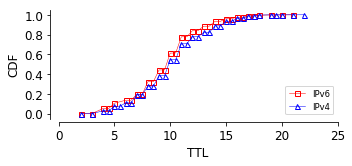

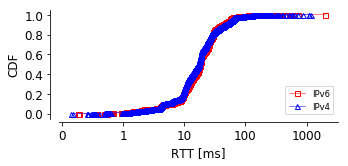

In [2]:
### TTL
# setup plot
ttl_cdf_fig, ttl_cdf_ax = plt.subplots(figsize = (5, 2))

ttl_cdf_v6 = Cdf.MakeCdfFromList(df_v6_medians['median(ttl)'])
ttl_cdf_v4 = Cdf.MakeCdfFromList(df_v4_medians['median(ttl)'])

ttl_cdf_ax.plot(ttl_cdf_v6.xs, ttl_cdf_v6.ps,
                label = 'IPv6',
                marker = 's',
                linewidth = 0.5,
                markersize = 5,
                fillstyle = 'none',
                color = 'red')
ttl_cdf_ax.plot(ttl_cdf_v4.xs, ttl_cdf_v4.ps,
                label = 'IPv4',
                marker = '^',
                linewidth = 0.5,
                markersize = 5,
                fillstyle = 'none',
                color = 'blue')

# PLOT FORMATTING
# customize axes and grid appearance
ttl_cdf_ax.legend(loc = 'lower right', fontsize = 'smaller')
ttl_cdf_ax.set_xlabel('TTL')
ttl_cdf_ax.set_ylabel('CDF')
ttl_cdf_ax.set_xlim([0, 25])
ttl_cdf_ax.set_ylim([-0.05, 1.05])

yticks = np.arange(0.0, 1.01, 0.2)
ttl_cdf_ax.set_yticks(yticks)
ttl_cdf_ax.grid(False)
ttl_cdf_ax.spines['right'].set_color('none')
ttl_cdf_ax.spines['top'].set_color('none')
ttl_cdf_ax.yaxis.set_ticks_position('left')
ttl_cdf_ax.xaxis.set_ticks_position('bottom')
ttl_cdf_ax.spines['bottom'].set_position(('axes', -0.03))
ttl_cdf_ax.spines['left'].set_position(('axes', -0.03))


### RTT
# setup plot
rtt_cdf_fig, rtt_cdf_ax = plt.subplots(figsize = (5, 2))

rtt_cdf_v6 = Cdf.MakeCdfFromList(df_v6_medians['median(rtt)'])
rtt_cdf_v4 = Cdf.MakeCdfFromList(df_v4_medians['median(rtt)'])

rtt_cdf_ax.plot(rtt_cdf_v6.xs, rtt_cdf_v6.ps,
                label = 'IPv6',
                marker = 's',
                linewidth = 0.5,
                markersize = 5,
                fillstyle = 'none',
                color = 'red')
rtt_cdf_ax.plot(rtt_cdf_v4.xs, rtt_cdf_v4.ps,
                label = 'IPv4',
                marker = '^',
                linewidth = 0.5,
                markersize = 5,
                fillstyle = 'none',
                color = 'blue')

# PLOT FORMATTING
# customize axes and grid appearance
rtt_cdf_ax.legend(loc = 'lower right', fontsize = 'smaller')
rtt_cdf_ax.set_xlabel('RTT [ms]')
rtt_cdf_ax.set_xscale('log')

from matplotlib.ticker import ScalarFormatter
rtt_cdf_ax.xaxis.set_major_formatter(ScalarFormatter())

rtt_cdf_ax.set_ylabel('CDF')
rtt_cdf_ax.set_ylim([-0.05, 1.05])
rtt_cdf_ax.minorticks_off()

rtt_cdf_ax.set_yticks(yticks)
rtt_cdf_ax.grid(False)
rtt_cdf_ax.spines['right'].set_color('none')
rtt_cdf_ax.spines['top'].set_color('none')
rtt_cdf_ax.yaxis.set_ticks_position('left')
rtt_cdf_ax.xaxis.set_ticks_position('bottom')
rtt_cdf_ax.spines['bottom'].set_position(('axes', -0.03))
rtt_cdf_ax.spines['left'].set_position(('axes', -0.03))


# saving and showing plot
#ttl_cdf_fig.savefig('plots/cdfs_median_ttl.pdf', bbox_inches = 'tight')
#rtt_cdf_fig.savefig('plots/cdfs_median_rtt.pdf', bbox_inches = 'tight')
plt.show()


### Both in one figure

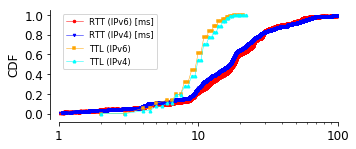

In [3]:
# setup plot
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))

rtt_cdf_v6 = Cdf.MakeCdfFromList(df_v6_medians['median(rtt)'])
rtt_cdf_v4 = Cdf.MakeCdfFromList(df_v4_medians['median(rtt)'])

cdf_ax.plot(rtt_cdf_v6.xs, rtt_cdf_v6.ps,
            label = 'RTT (IPv6) [ms]', 
            marker = 'o',
            linewidth = 0.5,
            markersize = 2.5,
            color = 'red')
cdf_ax.plot(rtt_cdf_v4.xs, rtt_cdf_v4.ps,
            label = 'RTT (IPv4) [ms]',
            marker = 'v',
            linewidth = 0.5,
            markersize = 2.5,
            color = 'blue')

ttl_cdf_v6 = Cdf.MakeCdfFromList(df_v6_medians['median(ttl)'])
ttl_cdf_v4 = Cdf.MakeCdfFromList(df_v4_medians['median(ttl)'])

cdf_ax.plot(ttl_cdf_v6.xs, ttl_cdf_v6.ps,
            label = 'TTL (IPv6)',
            marker = 's',
            linewidth = 0.5,
            markersize = 2.5,
            markeredgewidth = 1.5,
            color = 'orange')
cdf_ax.plot(ttl_cdf_v4.xs, ttl_cdf_v4.ps,
            label = 'TTL (IPv4)',
            marker = '^',
            linewidth = 0.5,
            markersize = 2.5,
            markeredgewidth = 1.5,
            color = 'cyan')


# PLOT FORMATTING
# customize axes and grid appearance
yticks = np.arange(0.0, 1.01, 0.2)
cdf_ax.set_yticks(yticks)

cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))

cdf_ax.legend(loc = 'upper left', fontsize = 'smaller')
cdf_ax.set_ylabel('CDF')
cdf_ax.set_xlim([1, 100])
cdf_ax.set_xscale('log')
cdf_ax.set_ylim([-0.05, 1.05])

from matplotlib.ticker import EngFormatter
cdf_ax.xaxis.set_major_formatter(EngFormatter())

# saving and showing plot
cdf_fig.savefig('plots/cdfs_median_both.pdf', bbox_inches = 'tight')
plt.show()


## Distributions of median metrics

In [4]:
print('-- IPv4 --')
print('m_ttl; cdf')
print('----------')
for x, y in zip(ttl_cdf_v4.xs, ttl_cdf_v4.ps):
    print('%.2f; %.5f' % (x, y))

-- IPv4 --
m_ttl; cdf
----------
2.00; 0.00021
3.00; 0.00059
4.00; 0.02822
4.50; 0.02834
5.00; 0.07435
5.50; 0.07448
6.00; 0.10825
6.50; 0.10833
7.00; 0.19036
7.50; 0.19095
8.00; 0.27810
8.50; 0.27874
9.00; 0.38355
9.50; 0.38461
10.00; 0.54332
10.50; 0.54705
11.00; 0.70559
11.50; 0.70737
12.00; 0.77876
12.50; 0.77969
13.00; 0.82062
13.50; 0.82121
14.00; 0.88747
14.50; 0.88853
15.00; 0.93285
15.50; 0.93353
16.00; 0.96378
16.50; 0.96386
17.00; 0.98661
17.50; 0.98665
18.00; 0.99742
19.00; 0.99873
19.50; 0.99877
20.00; 0.99911
21.00; 0.99936
22.00; 1.00000


In [5]:
print('-- IPv6 --')
print('m_ttl; cdf')
print('----------')
for x, y in zip(ttl_cdf_v6.xs, ttl_cdf_v6.ps):
    print('%.2f; %.5f' % (x, y))

-- IPv6 --
m_ttl; cdf
----------
2.00; 0.00009
3.00; 0.00053
4.00; 0.05252
4.50; 0.05257
5.00; 0.10500
6.00; 0.13529
6.50; 0.13533
7.00; 0.19396
7.50; 0.19400
8.00; 0.32319
8.50; 0.32333
9.00; 0.44164
9.50; 0.44257
10.00; 0.61199
10.50; 0.61385
11.00; 0.77699
11.50; 0.77743
12.00; 0.83955
12.50; 0.83995
13.00; 0.88416
13.50; 0.88447
14.00; 0.93289
14.50; 0.93328
15.00; 0.96092
15.50; 0.96127
16.00; 0.97489
16.50; 0.97493
17.00; 0.99098
17.50; 0.99102
18.00; 0.99558
19.00; 0.99854
20.00; 0.99876
21.00; 1.00000


In [6]:
print('-- IPv4 --')
print('m_rtt; cdf')
print('----------')
for x, y in list(zip(rtt_cdf_v4.xs, rtt_cdf_v4.ps))[0::100]:
    print('%.2f; %.5f' % (x, y))

-- IPv4 --
m_rtt; cdf
----------
0.14; 0.00004
1.06; 0.00809
1.38; 0.01555
1.67; 0.02262
1.95; 0.02817
2.39; 0.03334
2.65; 0.03974
3.31; 0.04474
3.75; 0.05012
3.93; 0.05804
4.08; 0.06525
4.20; 0.07940
4.35; 0.09219
4.82; 0.09838
5.09; 0.10405
5.66; 0.10880
5.97; 0.11541
6.28; 0.12100
6.54; 0.12634
6.80; 0.13181
7.12; 0.13676
7.67; 0.14151
8.22; 0.14634
8.55; 0.15151
8.72; 0.15769
8.85; 0.16595
8.97; 0.17299
9.15; 0.18010
9.30; 0.18718
9.42; 0.19506
9.53; 0.20637
9.64; 0.21777
9.75; 0.22938
9.86; 0.23933
9.98; 0.24793
10.11; 0.25675
10.25; 0.26429
10.38; 0.27217
10.52; 0.28001
10.64; 0.28806
10.79; 0.29615
10.91; 0.30538
11.05; 0.31339
11.22; 0.32043
11.39; 0.32657
11.55; 0.33280
11.71; 0.33907
11.89; 0.34534
12.05; 0.35182
12.20; 0.35839
12.37; 0.36500
12.53; 0.37148
12.74; 0.37749
13.02; 0.38271
13.26; 0.38809
13.48; 0.39376
13.68; 0.39986
13.85; 0.40613
14.02; 0.41219
14.23; 0.41834
14.43; 0.42469
14.64; 0.43058
14.88; 0.43643
15.10; 0.44215
15.35; 0.44723
15.54; 0.45287
15.79; 0.458

In [7]:
print('-- IPv6 --')
print('m_rtt; cdf')
print('----------')
for x, y in list(zip(rtt_cdf_v6.xs, rtt_cdf_v6.ps))[0::100]:
    print('%.2f; %.5f' % (x, y))

-- IPv6 --
m_rtt; cdf
----------
0.18; 0.00004
1.11; 0.01251
1.41; 0.02043
1.76; 0.02763
2.04; 0.03413
2.38; 0.04253
2.99; 0.04837
3.61; 0.05328
3.98; 0.05951
4.16; 0.06893
4.34; 0.08033
4.74; 0.09170
5.54; 0.09665
6.32; 0.10142
6.54; 0.10788
6.81; 0.11367
7.22; 0.11902
7.73; 0.12428
8.10; 0.12945
8.57; 0.13427
8.75; 0.14073
8.88; 0.14944
9.00; 0.15775
9.16; 0.16500
9.29; 0.17225
9.42; 0.18216
9.55; 0.19175
9.68; 0.20046
9.83; 0.20837
9.99; 0.21629
10.15; 0.22354
10.31; 0.22986
10.48; 0.23645
10.66; 0.24295
10.85; 0.24909
11.08; 0.25475
11.28; 0.26103
11.45; 0.26784
11.60; 0.27540
11.76; 0.28296
11.91; 0.29003
12.07; 0.29768
12.21; 0.30595
12.35; 0.31422
12.52; 0.32081
12.71; 0.32722
12.93; 0.33305
13.17; 0.33880
13.37; 0.34450
13.56; 0.35078
13.73; 0.35649
13.90; 0.36325
14.11; 0.36966
14.32; 0.37585
14.58; 0.38138
14.86; 0.38677
15.14; 0.39239
15.38; 0.39778
15.62; 0.40335
15.84; 0.40892
16.11; 0.41449
16.32; 0.41998
16.51; 0.42594
16.69; 0.43244
16.85; 0.44000
16.98; 0.45066
17.12; 